In [1]:
import os
import shutil
import itertools
import pathlib
from PIL import Image


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths =[]
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [3]:
train_df

,filepaths,label
0,C:\Users\Dell\Desktop\.ipynb_checkpoints\archi...,glioma
1,C:\Users\Dell\Desktop\.ipynb_checkpoints\archi...,glioma
2,C:\Users\Dell\Desktop\.ipynb_checkpoints\archi...,glioma
3,C:\Users\Dell\Desktop\.ipynb_checkpoints\archi...,glioma
4,C:\Users\Dell\Desktop\.ipynb_checkpoints\archi...,glioma
...,...,...
5707,C:\Users\Dell\Desktop\.ipynb_checkpoints\archi...,pituitary
5708,C:\Users\Dell\Desktop\.ipynb_checkpoints\archi...,pituitary
5709,C:\Users\Dell\Desktop\.ipynb_checkpoints\archi...,pituitary
5710,C:\Users\Dell\Desktop\.ipynb_checkpoints\archi...,pituitary


In [4]:
import os
import cv2
import numpy as np
import pandas as pd

train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths = []
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

images = []
for filepath in filepaths:
    img = cv2.imread(filepath)
    # Resize the image to a fixed size
    img = cv2.resize(img, (100, 100))  # Adjust the size as needed
    img_vector = img.flatten()
    # Append the image vector to the list
    images.append(img_vector)

# Convert the images list to a numpy array
images_array = np.array(images)

# Create DataFrame
Fseries = pd.Series(images_array.tolist(), name='image_vector')
Lseries = pd.Series(labels, name='label')
train_df = pd.concat([Fseries, Lseries], axis=1)

print(train_df)


                                           image_vector      label
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     glioma
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     glioma
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     glioma
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     glioma
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     glioma
...                                                 ...        ...
5707  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  pituitary
5708  [0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, ...  pituitary
5709  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...  pituitary
5710  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  pituitary
5711  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  pituitary

[5712 rows x 2 columns]


In [5]:
import os
import cv2
import numpy as np
import pandas as pd

# Assuming this code was executed before
train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths = []
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

# Initialize empty lists to store image data
images = []
for filepath in filepaths:
    # Read image using OpenCV
    img = cv2.imread(filepath)
    # Resize the image to a fixed size
    img = cv2.resize(img, (100, 100)) 
    img_vector = img.flatten()
    # Append the image vector to the list
    images.append(img_vector)

# Convert the images list to a numpy array
images_array = np.array(images)

# Create DataFrame
Fseries = pd.Series(images_array.tolist(), name='image_vector')
Lseries = pd.Series(labels, name='label')
train_df = pd.concat([Fseries, Lseries], axis=1)

# Calculate intraclass spread and interclass distances
class_labels = train_df['label'].unique()

# Initialize empty dictionaries to store mean vectors and spread vectors for each class
class_mean_vectors = {}
class_spread_vectors = {}

# Calculate mean vector and spread vector for each class
for label in class_labels:
    # Filter images belonging to the current class
    class_images = train_df[train_df['label'] == label]['image_vector']
    
    # Convert the image vectors to NumPy arrays
    class_images_array = np.array([np.array(image) for image in class_images])
    
    # Calculate mean vector for the current class
    mean_vector = np.mean(class_images_array, axis=0)
    class_mean_vectors[label] = mean_vector
    
    # Calculate spread vector for the current class
    spread_vector = np.std(class_images_array, axis=0)
    class_spread_vectors[label] = spread_vector

# Calculate interclass distances between mean vectors
interclass_distances = {}
for i in range(len(class_labels)):
    for j in range(i + 1, len(class_labels)):
        class1 = class_labels[i]
        class2 = class_labels[j]
        centroid1 = class_mean_vectors[class1]
        centroid2 = class_mean_vectors[class2]
        distance = np.linalg.norm(centroid1 - centroid2)
        interclass_distances[(class1, class2)] = distance

# Print intraclass spread and interclass distances
print("Intraclass Spread (Standard Deviation):")
for label, spread_vector in class_spread_vectors.items():
    print(f"{label}: {spread_vector}")

print("\nInterclass Distances between Mean Vectors:")
for classes, distance in interclass_distances.items():
    print(f"{classes[0]} - {classes[1]}: {distance}")


Intraclass Spread (Standard Deviation):
glioma: [0.10276846 0.10276846 0.10276846 ... 0.07269587 0.07269587 0.07269587]
meningioma: [ 9.79214224  9.79214224  9.79214224 ... 10.43629164 10.43629164
 10.43629164]
notumor: [33.97686755 33.66410904 33.59559123 ... 37.60917814 37.33283787
 37.2738257 ]
pituitary: [5.03742469 5.03742469 5.03742469 ... 3.94969365 3.94969365 3.94969365]

Interclass Distances between Mean Vectors:
glioma - meningioma: 2140.8735005671606
glioma - notumor: 5444.0055166350985
glioma - pituitary: 3872.8915382706746
meningioma - notumor: 3553.279106356408
meningioma - pituitary: 2893.868747047778
notumor - pituitary: 3949.006525918204


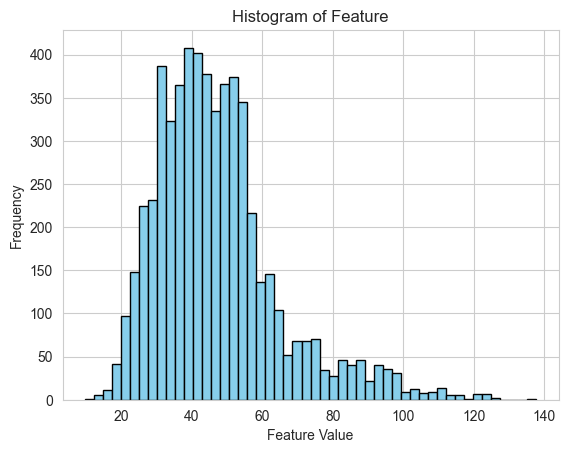

Mean: 47.19229390756302
Variance: 311.43085780228586


In [6]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths = []
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

images = []
for filepath in filepaths:
    img = cv2.imread(filepath)
    # Resize the image to a fixed size
    img = cv2.resize(img, (100, 100))  # Adjust the size as needed
    img_vector = img.flatten()
    # Append the feature (for example, pixel intensity) to the list
    feature_value = np.mean(img_vector)  # Example: using mean pixel intensity as the feature
    images.append(feature_value)

# Convert the feature values list to a numpy array
feature_array = np.array(images)

# Plot histogram
plt.hist(feature_array, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Feature')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate mean and variance
mean_value = np.mean(feature_array)
variance_value = np.var(feature_array)

print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")


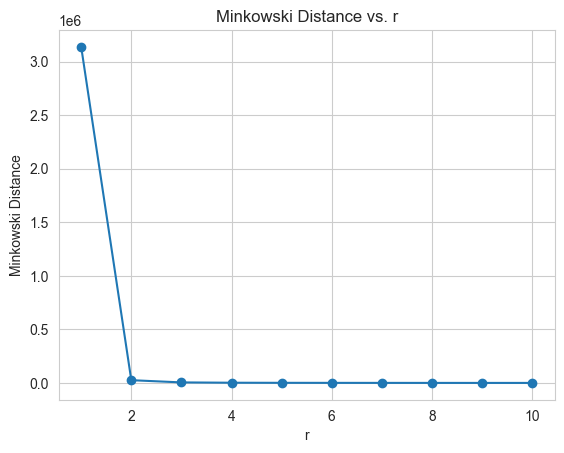

In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths = []
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

images = []
for filepath in filepaths:
    img = cv2.imread(filepath)
    # Resize the image to a fixed size
    img = cv2.resize(img, (100, 100))  # Adjust the size as needed
    img_vector = img.flatten()
    # Append the feature vector to the list
    images.append(img_vector)

# Convert the feature vectors list to a numpy array
feature_array = np.array(images)

# Select any two feature vectors
feature_vector_1 = feature_array[0]
feature_vector_2 = feature_array[1]

# Calculate Minkowski distance for r from 1 to 10
r_values = range(1, 11)
minkowski_distances = []

for r in r_values:
    distance = np.linalg.norm(feature_vector_1 - feature_vector_2, ord=r)
    minkowski_distances.append(distance)

# Plot the Minkowski distance
plt.plot(r_values, minkowski_distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()


In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
train_data_path = r"C:\Users\AKMAL SK MD\OneDrive - Amrita vishwa vidyapeetham\Desktop\DATASET\Training"
filepaths = []
labels = []
folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

images = []
for filepath in filepaths:
    img = cv2.imread(filepath)
    # Resize the image to a fixed size
    img = cv2.resize(img, (100, 100))  # Adjust the size as needed
    img_vector = img.flatten()
    # Append the feature vector to the list
    images.append(img_vector)

# Convert the feature vectors list to a numpy array
X = np.array(images)
y = np.array(labels)

# Divide the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train and y_train are obtained from the previous exercise
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training data
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [10]:
# Using predict() function to study prediction behavior for test vectors
predictions = neigh.predict(X_test)

# Print the predictions
print("Predictions for test vectors:")
print(predictions)

# Perform classification for a specific test vector
# Let's say test_vect is the first feature vector from the test set
test_vector_index = 0
test_vector = X_test[test_vector_index]
prediction_for_test_vector = neigh.predict([test_vector])

# Print the classification result for the specific test vector
print("Prediction for the specific test vector:")
print(prediction_for_test_vector)


Predictions for test vectors:
['meningioma' 'notumor' 'glioma' ... 'meningioma' 'notumor' 'meningioma']
Prediction for the specific test vector:
['meningioma']


Overall Accuracy for kNN: 0.8383
Overall Accuracy for NN: 0.9032


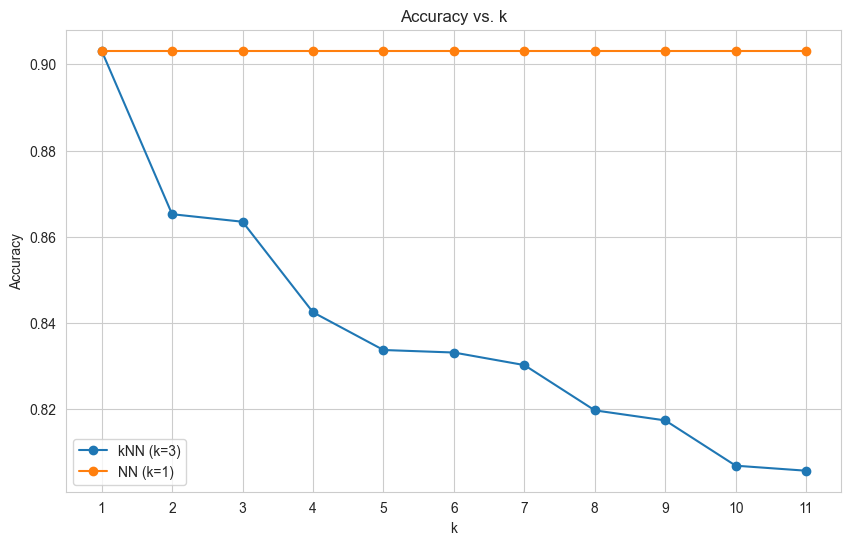

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store accuracies for kNN and NN classifiers
accuracies_kNN = []
accuracies_NN = []

# Vary k from 1 to 11
k_values = range(1, 12)

for k in k_values:
    # Create kNN classifier with k neighbors
    neigh_kNN = KNeighborsClassifier(n_neighbors=k)
    # Train kNN classifier
    neigh_kNN.fit(X_train, y_train)
    # Make predictions
    y_pred_kNN = neigh_kNN.predict(X_test)
    # Calculate accuracy and store it
    accuracy_kNN = accuracy_score(y_test, y_pred_kNN)
    accuracies_kNN.append(accuracy_kNN)
    
    # Create NN classifier with k=1
    neigh_NN = KNeighborsClassifier(n_neighbors=1)
    # Train NN classifier
    neigh_NN.fit(X_train, y_train)
    # Make predictions
    y_pred_NN = neigh_NN.predict(X_test)
    # Calculate accuracy and store it
    accuracy_NN = accuracy_score(y_test, y_pred_NN)
    accuracies_NN.append(accuracy_NN)
# Calculate and print overall accuracy for kNN
overall_accuracy_kNN = np.mean(accuracies_kNN)
print(f"Overall Accuracy for kNN: {overall_accuracy_kNN:.4f}")

# Calculate and print overall accuracy for NN
overall_accuracy_NN = np.mean(accuracies_NN)
print(f"Overall Accuracy for NN: {overall_accuracy_NN:.4f}")

# Plot the accuracies for kNN and NN classifiers
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_kNN, marker='o', label='kNN (k=3)')
plt.plot(k_values, accuracies_NN, marker='o', label='NN (k=1)')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluate confusion matrix for kNN (k=3) classifier
confusion_matrix_kNN = confusion_matrix(y_test, y_pred_kNN)
print("Confusion Matrix for kNN (k=3) Classifier:")
print(confusion_matrix_kNN)

# Compute precision, recall, and F1-score for kNN (k=3) classifier
precision_kNN = precision_score(y_test, y_pred_kNN, average='macro')
recall_kNN = recall_score(y_test, y_pred_kNN, average='macro')
f1_score_kNN = f1_score(y_test, y_pred_kNN, average='macro')
print("Precision for kNN (k=3) Classifier:", precision_kNN)
print("Recall for kNN (k=3) Classifier:", recall_kNN)
print("F1-score for kNN (k=3) Classifier:", f1_score_kNN)

# Evaluate confusion matrix for NN (k=1) classifier
confusion_matrix_NN = confusion_matrix(y_test, y_pred_NN)
print("\nConfusion Matrix for NN (k=1) Classifier:")
print(confusion_matrix_NN)

# Compute precision, recall, and F1-score for NN (k=1) classifier
precision_NN = precision_score(y_test, y_pred_NN, average='macro')
recall_NN = recall_score(y_test, y_pred_NN, average='macro')
f1_score_NN = f1_score(y_test, y_pred_NN, average='macro')
print("Precision for NN (k=1) Classifier:", precision_NN)
print("Recall for NN (k=1) Classifier:", recall_NN)
print("F1-score for NN (k=1) Classifier:", f1_score_NN)


Confusion Matrix for kNN (k=3) Classifier:
[[373  37   6   9]
 [128 189  42  46]
 [ 20   2 411  18]
 [ 19   2   4 408]]
Precision for kNN (k=3) Classifier: 0.8121004260723953
Recall for kNN (k=3) Classifier: 0.7994713022317635
F1-score for kNN (k=3) Classifier: 0.7901137809157626

Confusion Matrix for NN (k=1) Classifier:
[[386  31   4   4]
 [ 57 308  25  15]
 [  7   9 427   8]
 [  3   2   1 427]]
Precision for NN (k=1) Classifier: 0.901745062595216
Recall for NN (k=1) Classifier: 0.9004143076849485
F1-score for NN (k=1) Classifier: 0.8996224215216975
